In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print (cancer)



{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 

In [3]:
### Amount of features present in data set
print (len(cancer['feature_names']))

30


In [5]:
import numpy as np
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df= (pd.DataFrame(data, columns=columns))
print (df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

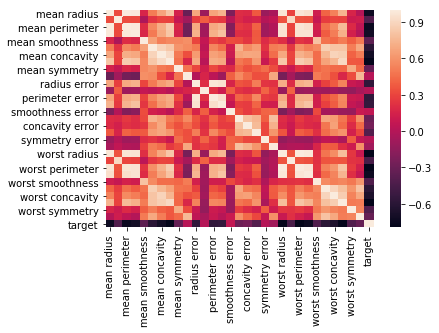

In [6]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)


> ### We are attempting to predict whether or not a feature is able to predict whether or not somebody has cancer.
>### White has the largest positive correlation and black the largest negative correlation. We are looking for features with the highest correlation (either positive or negative) with the target variable.  These will prove most useful in our model.  Based on this correlation matrix I would consider "mean symmetry", worst perimiter,mean radius, mean smoothness, mean symmetry, and worst radius to be most significant.

In [7]:
x = df[df.columns[:-1]]
y = df.target

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [2**(x+1) for x in range(4)]}, verbose=12, refit=True)
clf.fit(df_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9097744360902256, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.8872180451127819, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.9090909090909091, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9548872180451128, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9323308270676691, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.9242424242424242, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .......... n

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 4, 8, 16]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=12)

In [9]:
print(clf.grid_scores_)
print(clf.best_params_)

[mean: 0.90201, std: 0.01048, params: {'n_neighbors': 2}, mean: 0.93719, std: 0.01297, params: {'n_neighbors': 4}, mean: 0.93719, std: 0.01898, params: {'n_neighbors': 8}, mean: 0.92211, std: 0.00968, params: {'n_neighbors': 16}]
{'n_neighbors': 4}


C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


---- Train Performance: -------------------
[[134  10]
 [  9 245]]
             precision    recall  f1-score   support

        0.0       0.94      0.93      0.93       144
        1.0       0.96      0.96      0.96       254

avg / total       0.95      0.95      0.95       398



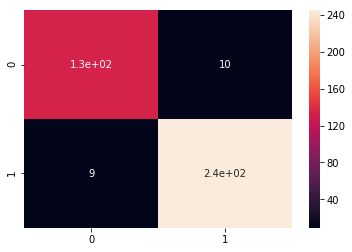

In [10]:
from sklearn.metrics import (classification_report, confusion_matrix)
print('---- Train Performance: -------------------')
y_pred = clf.predict(df_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=confusion_matrix(y_train, y_pred))

In [11]:
from __future__ import print_function

from pprint import pprint
from time import time
import logging


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')

In [18]:
#######
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
                    ('pca', PCA()),
                    ('knn', KNeighborsClassifier())
    
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
                'knn__n_neighbors': (1,3,5,7,8,9,11,13,15,17),
                'pca__n_components': (2,4,6,8,10,12)  
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=12)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(cancer.data, cancer.target)
print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['pca', 'knn']
parameters:
{'knn__n_neighbors': (1, 3, 5, 7, 8, 9, 11, 13, 15, 17),
 'pca__n_components': (2, 4, 6, 8, 10, 12)}
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Paralle

done in 2.695s

Best score: 0.931
Best parameters set:
	knn__n_neighbors: 9
	pca__n_components: 4


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.4s finished


>### According to our pipeline grid search 9 K nearest neighbors is the best criteria along with 4 out of our initial 31 features.

In [19]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [9]}, verbose=12, refit=True)
clf.fit(df_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.9398496240601504, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.9473684210526315, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.8863636363636364, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=12)

In [21]:
print('---- Train Performance: -------------------')
y_pred = clf.predict(df_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


---- Train Performance: -------------------
[[129  14]
 [  7 248]]
             precision    recall  f1-score   support

        0.0       0.95      0.90      0.92       143
        1.0       0.95      0.97      0.96       255

avg / total       0.95      0.95      0.95       398



> The classification report shows how well our model performed in terms of overall predicting power. Higher numbers are better, we want to get as close to 100 as possible. 100% across all categories means our model is perfect, 50% would be like flipping a coin in terms of a classification problem such as this (where evrything is either 1 thing or the other). Precesion is the fraction of relevant instances among the retrieved instances while recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.  Both of these combined together is essentially the f1-score which basically rate the overall effectiveness of the model in terms of classifying the relevent criteria.  Given that we average 95% across the model, we can determine that our model is quite good at classifying if a cancer is benign or malignant. 

pca__n_components
